## Decompose Time series into trend and seasonality (using Rainfall Data)

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# statsmodels seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# read datasets

df = pd.read_csv('data01.csv', parse_dates = ['time_start'] )
df.head()

,time_start,time_end,0580041RF,0600011RF,0600141RF,0600071RF,0610011RF,0620021RF,0620081RF,0630011RF,0630121RF,0670111RF,0670051RF
0,2011-01-01 00:00:00,1/1/2011 1:00,0.7,0.2,4.6,0.0,0.1,2.5,5.7,0.0,0.0,0.2,0.0
1,2011-01-01 01:00:00,1/1/2011 2:00,0.4,1.6,6.4,0.0,0.1,0.1,0.2,0.0,0.0,4.7,0.0
2,2011-01-01 02:00:00,1/1/2011 3:00,0.2,0.2,1.2,0.0,1.6,0.1,0.2,0.0,0.0,0.1,0.0
3,2011-01-01 03:00:00,1/1/2011 4:00,0.6,0.2,0.2,0.0,0.1,0.1,0.0,0.0,1.6,0.1,0.0
4,2011-01-01 04:00:00,1/1/2011 5:00,19.4,0.4,0.2,0.0,0.1,0.1,0.0,0.0,0.2,0.1,0.0


In [3]:
# date data from df

min_date = df['time_start'].min()
max_date = df['time_start'].max()

print(f'''
Start Date : {min_date}
End Date : {max_date}
''')


Start Date : 2011-01-01 00:00:00
End Date : 2020-12-30 23:00:00



In [4]:
# data preprocessing
# 0600011RF : station Kemaman

cols = ['time_start', '0600011RF']
df_kemaman = df[cols]
df_kemaman.set_index('time_start',inplace = True)
df_kemaman.rename(columns = {'0600011RF':'Precipitation'}, inplace = True)
df_kemaman

,Precipitation
time_start,
2011-01-01 00:00:00,0.2
2011-01-01 01:00:00,1.6
2011-01-01 02:00:00,0.2
2011-01-01 03:00:00,0.2
2011-01-01 04:00:00,0.4
...,...
2020-12-30 19:00:00,0.0
2020-12-30 20:00:00,0.0
2020-12-30 21:00:00,0.0


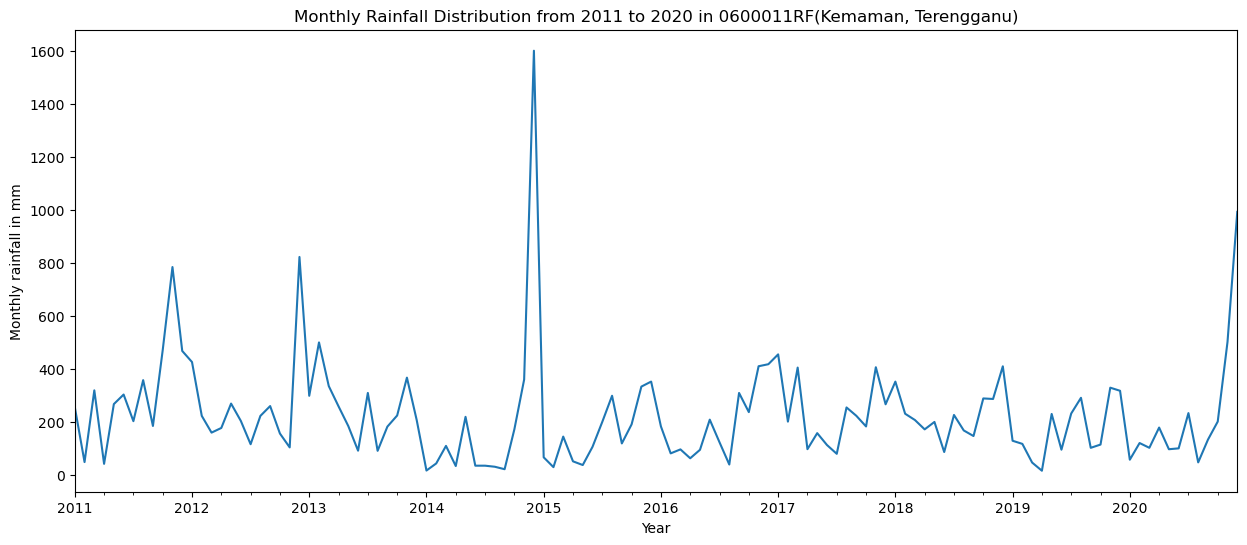

In [5]:
# rainfall by month
monthly_rain = df_kemaman['Precipitation'].resample('MS').sum()

# plot graph
monthly_rain.plot(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Monthly rainfall in mm')
plt.title('Monthly Rainfall Distribution from 2011 to 2020 in 0600011RF(Kemaman, Terengganu)', fontsize = 12)
plt.show()

#### Data smoothing

- Data smoothing is particularly important when dealing with time-series data, where there may be many fluctuations and sudden changes over time. By applying smoothing techniques, analysts can better understand the long-term trends in the data and make more accurate predictions about future behavior. 

#### Moving average
- The moving average method calculates the average of a set of values over a specified window size. This method is useful for removing high-frequency noise from the data but may not be effective for removing low-frequency noise.

- The window size determines how many data points are included in the calculation. Moving averages are useful for identifying trends in data sets as they smooth out fluctuations in the data.


In [6]:
# rolling mean
monthly_rain_df = pd.DataFrame(monthly_rain)
monthly_rain_df['rolling_mean'] = monthly_rain_df['Precipitation'].rolling(12).mean()
monthly_rain_df

,Precipitation,rolling_mean
time_start,,
2011-01-01,255.1,NaN
2011-02-01,47.5,NaN
2011-03-01,318.1,NaN
2011-04-01,40.8,NaN
2011-05-01,266.3,NaN
...,...,...
2020-08-01,46.3,148.983333
2020-09-01,132.2,151.566667
2020-10-01,200.3,158.800000


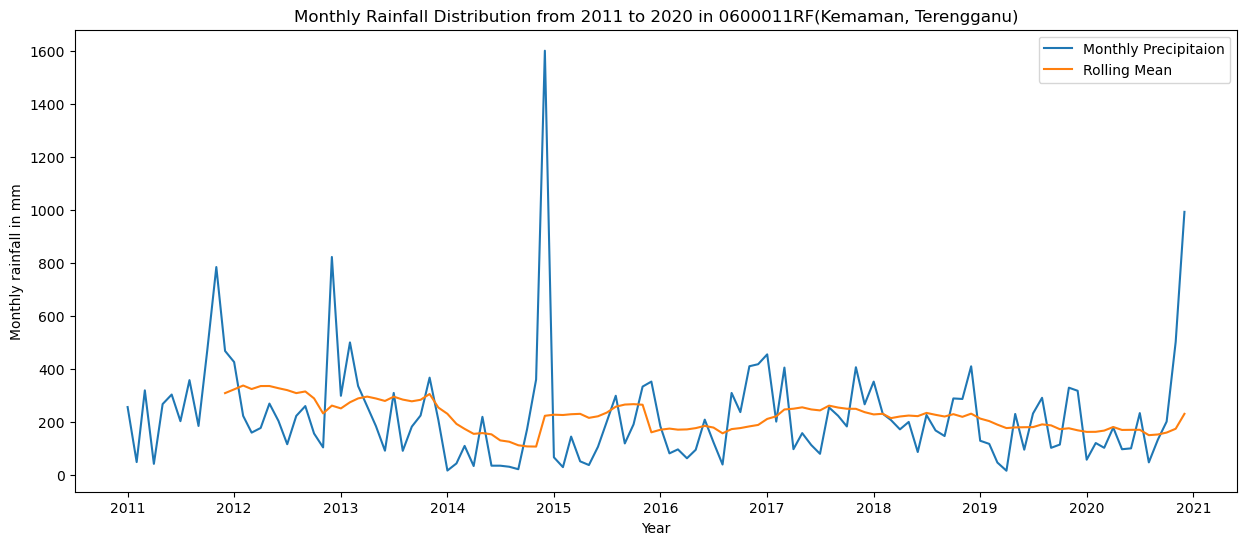

In [7]:
# smooth the line using moving average

plt.figure(figsize = (15,6))
plt.xlabel('Year')
plt.ylabel('Monthly rainfall in mm')
plt.title('Monthly Rainfall Distribution from 2011 to 2020 in 0600011RF(Kemaman, Terengganu)', fontsize = 12)
plt.plot(monthly_rain_df['Precipitation'], label = 'Monthly Precipitaion')
plt.plot(monthly_rain_df['rolling_mean'], label = 'Rolling Mean')
plt.legend()
plt.show()

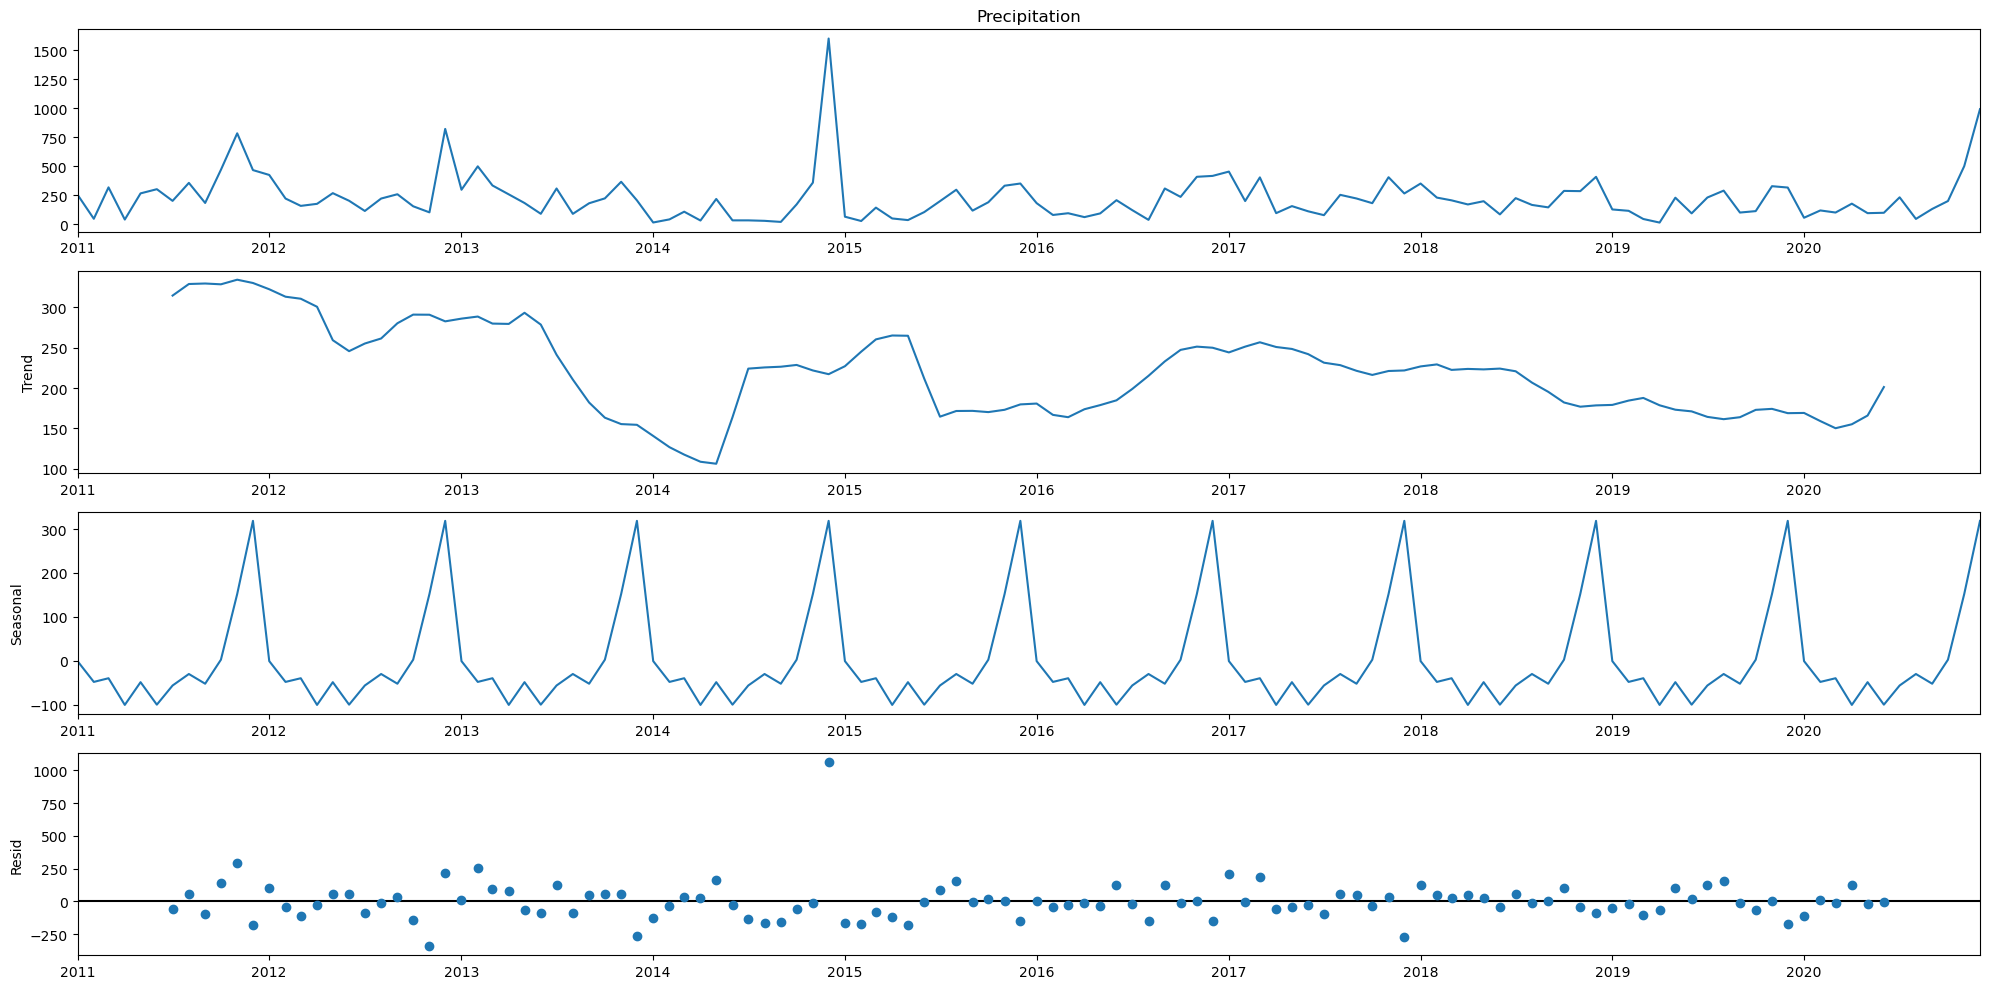

In [9]:
# plot the decomposition

plt.rc("figure", figsize=(20,10))
result = seasonal_decompose(monthly_rain, model='additive')
result.plot()
plt.show()

In [10]:
monthly_rain.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='time_start', length=120, freq='MS')

In [11]:
monthly_rain.values

array([ 255.1,   47.5,  318.1,   40.8,  266.3,  302.3,  201.8,  356.7,
        183.8,  469.4,  783.5,  466.8,  425. ,  221.8,  158.6,  176.2,
        268.2,  202.7,  114.8,  221.7,  258.8,  155.2,  102.8,  821.5,
        297.6,  499.1,  334.3,  257.8,  183.3,   90.4,  308.3,   89.9,
        181.2,  223.2,  366.1,  206.2,   15.5,   42.3,  108.5,   32.5,
        218.2,   33.8,   33.8,   29.8,   20.5,  171.2,  359. , 1599.9,
         65.4,   28.3,  143.6,   50.2,   36.3,  105.1,  199.3,  297.7,
        117.8,  189.8,  332.3,  351.2,  182.1,   80.3,   95.3,   61.8,
         93.8,  207.6,  122. ,   38.2,  308.3,  236. ,  409.1,  416.8,
        453.9,  200.2,  404. ,   96.1,  156.6,  111.8,   78.6,  253.6,
        222.2,  181.9,  405.4,  265.5,  351.1,  229.9,  206.2,  170.9,
        198.9,   85.4,  225.2,  166.8,  145.7,  287.6,  285.6,  408.9,
        127.9,  116.1,   45.6,   14.8,  229.1,   94.2,  230.7,  290. ,
        101.2,  113.5,  328.2,  316.5,   56.4,  119.3,  101.3,  177.7,
      